# Figures for FluidSF paper

In [3]:
import warnings

import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
warnings.filterwarnings("ignore")

## Figure 1: Structure functions from a 2D simulation

In [5]:
import h5py

f = h5py.File("../../docs/source/example_data/2layer_128.jld2", "r")
# f = h5py.File('/Users/cassswagner/Downloads/2D_TwoLayer_Data.jld2', 'r')
# f = h5py.File("../../docs/source/example_data/2layer_256.jld2", 'r')
grid = f["grid"]
snapshots = f["snapshots"]

# Initialize the grid of x and y coordinates
x = grid["x"][()]
y = grid["y"][()]

# Grab the top layer and final snapshot of the simulation for u, v, and q
u = snapshots["u"]["20050"][0]
v = snapshots["v"]["20050"][0]
q = snapshots["q"]["20050"][0]

In [6]:
import fluidsf

sf = fluidsf.generate_structure_functions(
    u=u, v=v, x=x, y=y, scalar=q, sf_type=["ASF_V", "ASF_S", "LLL", "LSS"]
)

In [7]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

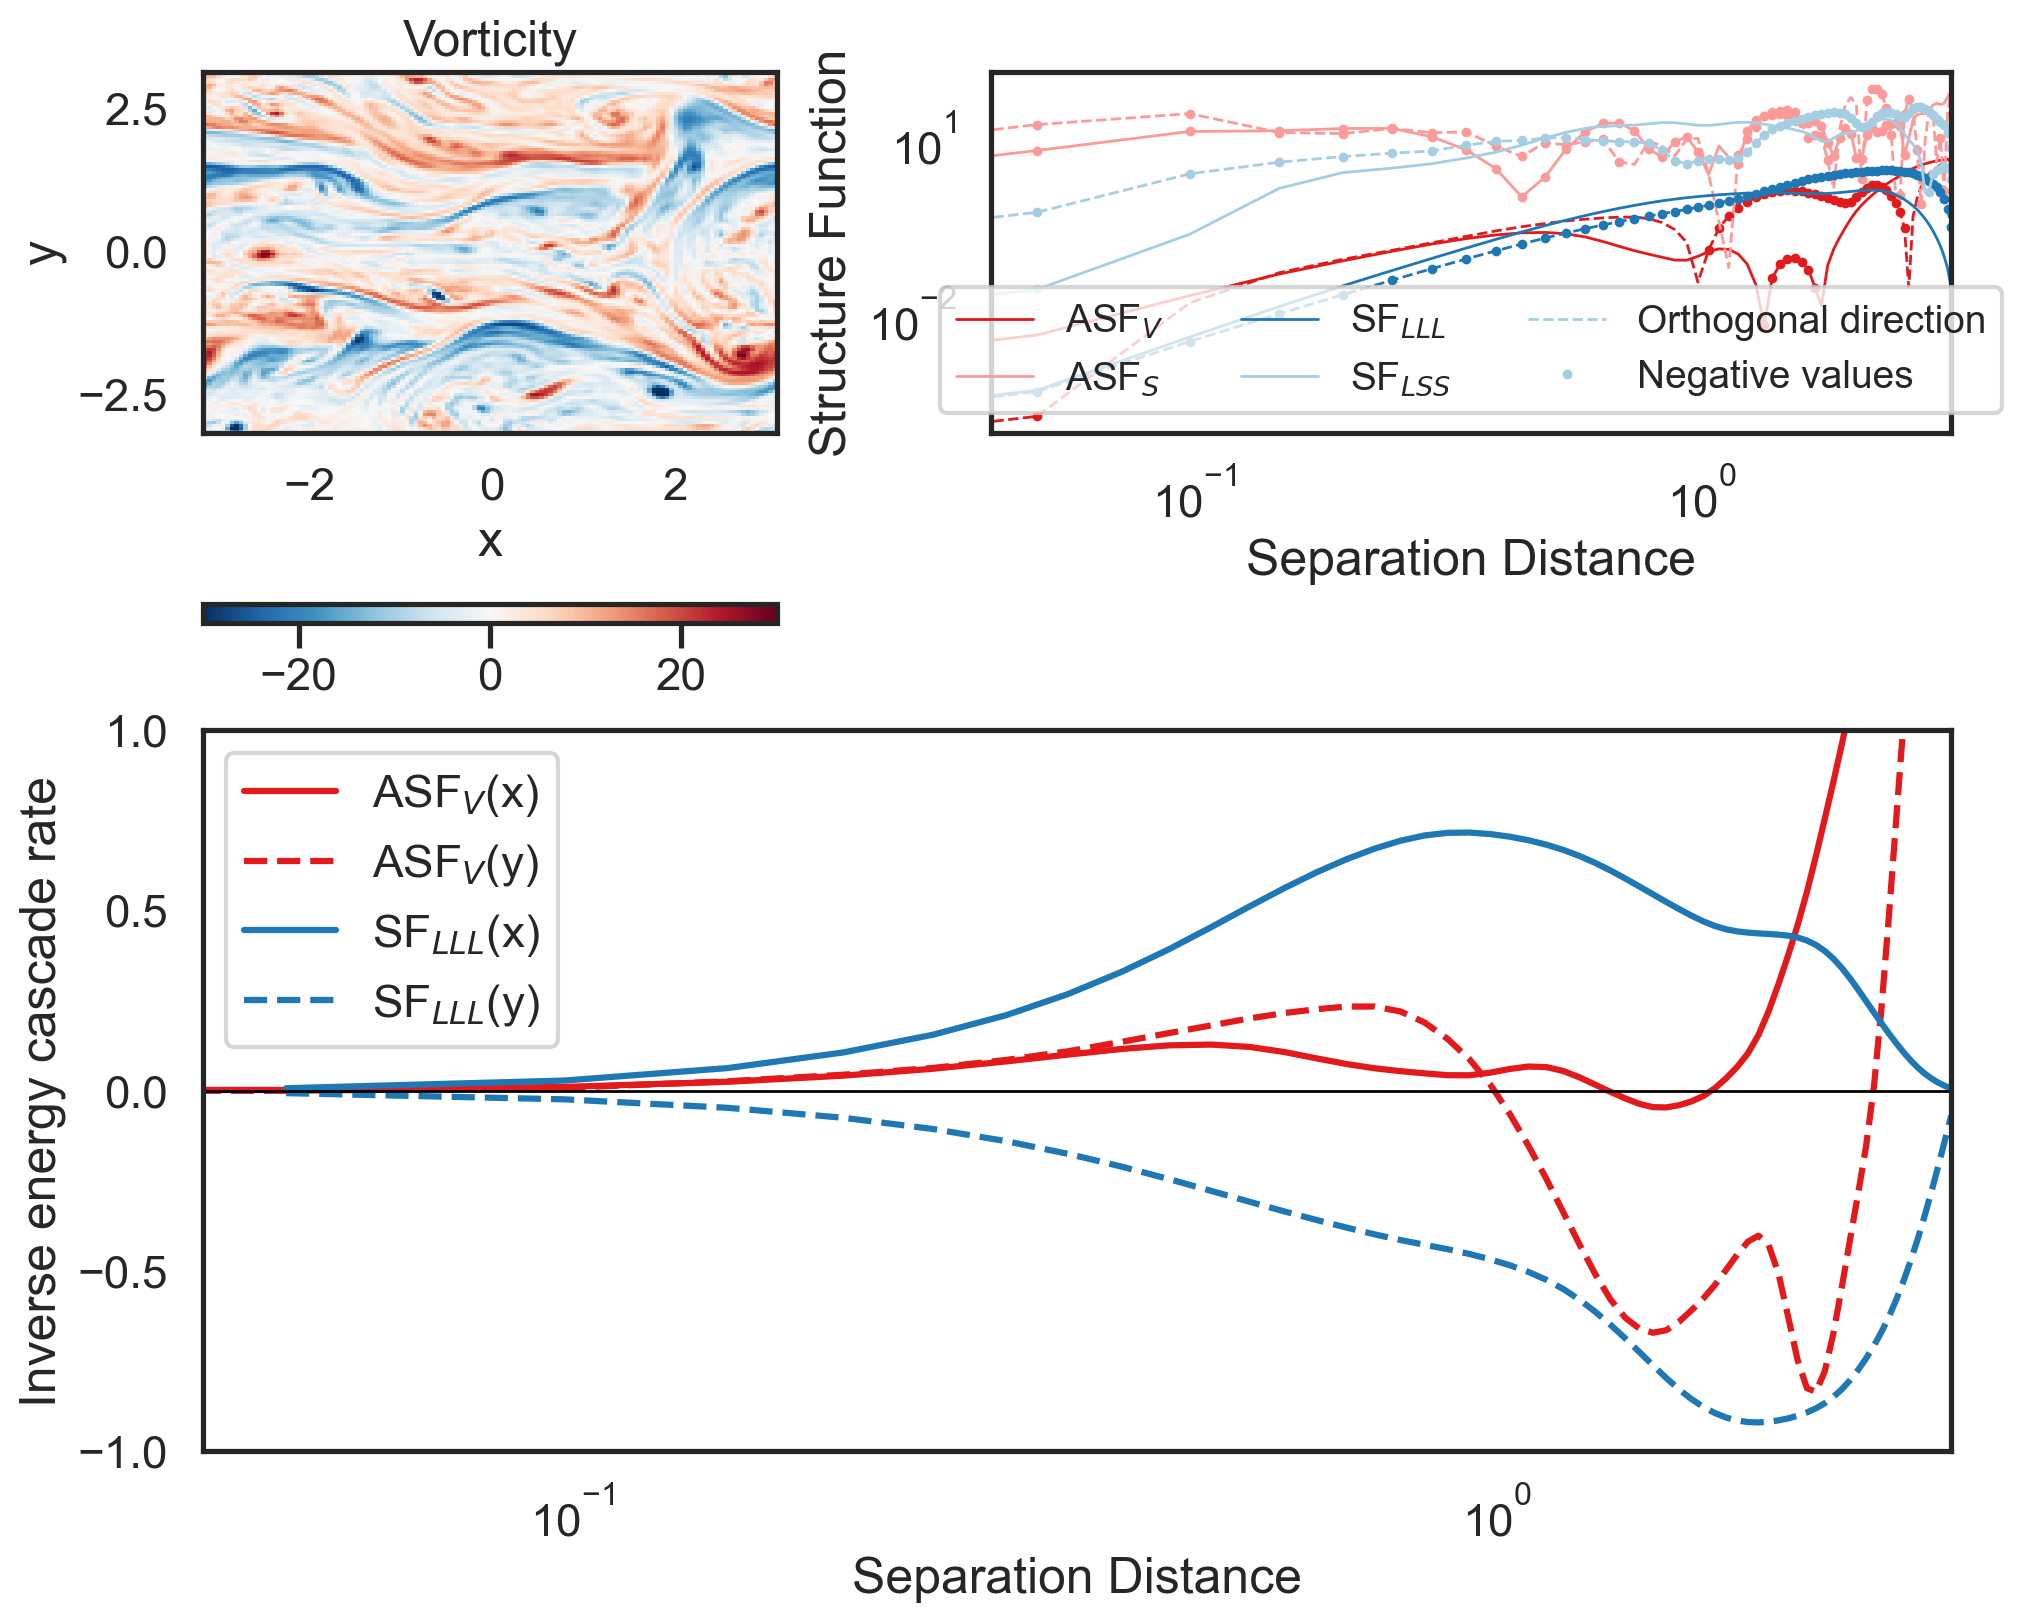

In [414]:
colors = plt.cm.Paired(np.linspace(0, 1, 12))

fig = plt.figure(layout="constrained", figsize=(12, 10))

gs = GridSpec(3, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1:, :])

q_map = ax1.pcolormesh(x, y, q, cmap="RdBu_r", vmin=-30, vmax=30)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Vorticity")
fig.colorbar(
    q_map,
    ax=ax1,
    location="bottom",
    aspect=30,
    # pad=-0.15,
)

ax2.loglog(
    sf["x-diffs"], abs(sf["SF_advection_velocity_x"]), label="ASF$_V$", color=colors[5],
    lw=1,
)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_advection_velocity_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[5],
)
ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_advection_velocity_y"]),
    color=colors[5],
    lw=1,
    linestyle="dashed",
)
ax2.loglog(
    sf["y-diffs"],
    -sf["SF_advection_velocity_y"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[5],
)

ax2.loglog(
    sf["x-diffs"], abs(sf["SF_advection_scalar_x"]), label="ASF$_S$", color=colors[4],lw=1,
)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_advection_scalar_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[4],
)
ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_advection_scalar_y"]),
    color=colors[4],
    lw=1,
    linestyle="dashed",
)
ax2.loglog(
    sf["y-diffs"],
    -sf["SF_advection_scalar_y"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[4],
)

ax2.loglog(sf["x-diffs"], abs(sf["SF_LLL_x"]), label="SF$_{LLL}$", color=colors[1],lw=1,)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_LLL_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[1],
)

ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_LLL_y"]),
    color=colors[1],
    lw=1,
    linestyle="dashed",
)
ax2.loglog(
    sf["y-diffs"],
    -sf["SF_LLL_y"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[1],
)

ax2.loglog(sf["x-diffs"], abs(sf["SF_LSS_x"]), label="SF$_{LSS}$", color=colors[0],lw=1,)
ax2.loglog(
    sf["x-diffs"],
    -sf["SF_LSS_x"],
    marker=".",
    ms=5,
    lw=0,
    color=colors[0],
)

ax2.loglog(
    sf["y-diffs"],
    abs(sf["SF_LSS_y"]),
    color=colors[0],
    lw=1,
    linestyle="dashed",
    label="Orthogonal direction",
)

ax2.loglog(
    sf["y-diffs"],
    -sf["SF_LSS_y"],
    marker=".",
    ms=5,
    label="Negative values",
    lw=0,
    color=colors[0],
)

ax2.set_xlabel("Separation Distance")
ax2.set_ylabel("Structure Function")
ax2.legend(ncol=3, loc="lower center", fontsize="14")
ax2.set_xlim(sf["x-diffs"].min(), sf["x-diffs"].max())

ax3.semilogx(sf["x-diffs"], sf["SF_advection_velocity_x"]/2, color=colors[5], label="ASF$_V$(x)")
ax3.semilogx(sf["y-diffs"], sf["SF_advection_velocity_y"]/2, color=colors[5], linestyle="dashed", label="ASF$_V$(y)")
ax3.semilogx(sf["x-diffs"], 2 * sf["SF_LLL_x"] / (3*sf["x-diffs"]), color=colors[1], label="SF$_{LLL}$(x)")
ax3.semilogx(sf["y-diffs"], 2 * sf["SF_LLL_y"] / (3*sf["y-diffs"]), color=colors[1], linestyle="dashed", label="SF$_{LLL}$(y)")
ax3.hlines(0, sf["x-diffs"].min(), sf["x-diffs"].max(), lw=1, color="black")
ax3.set_xlabel("Separation Distance")
ax3.set_ylabel("Inverse energy cascade rate")
ax3.set_ylim(-1,1)
ax3.set_xlim(sf["x-diffs"].min(), sf["x-diffs"].max())
ax3.legend();

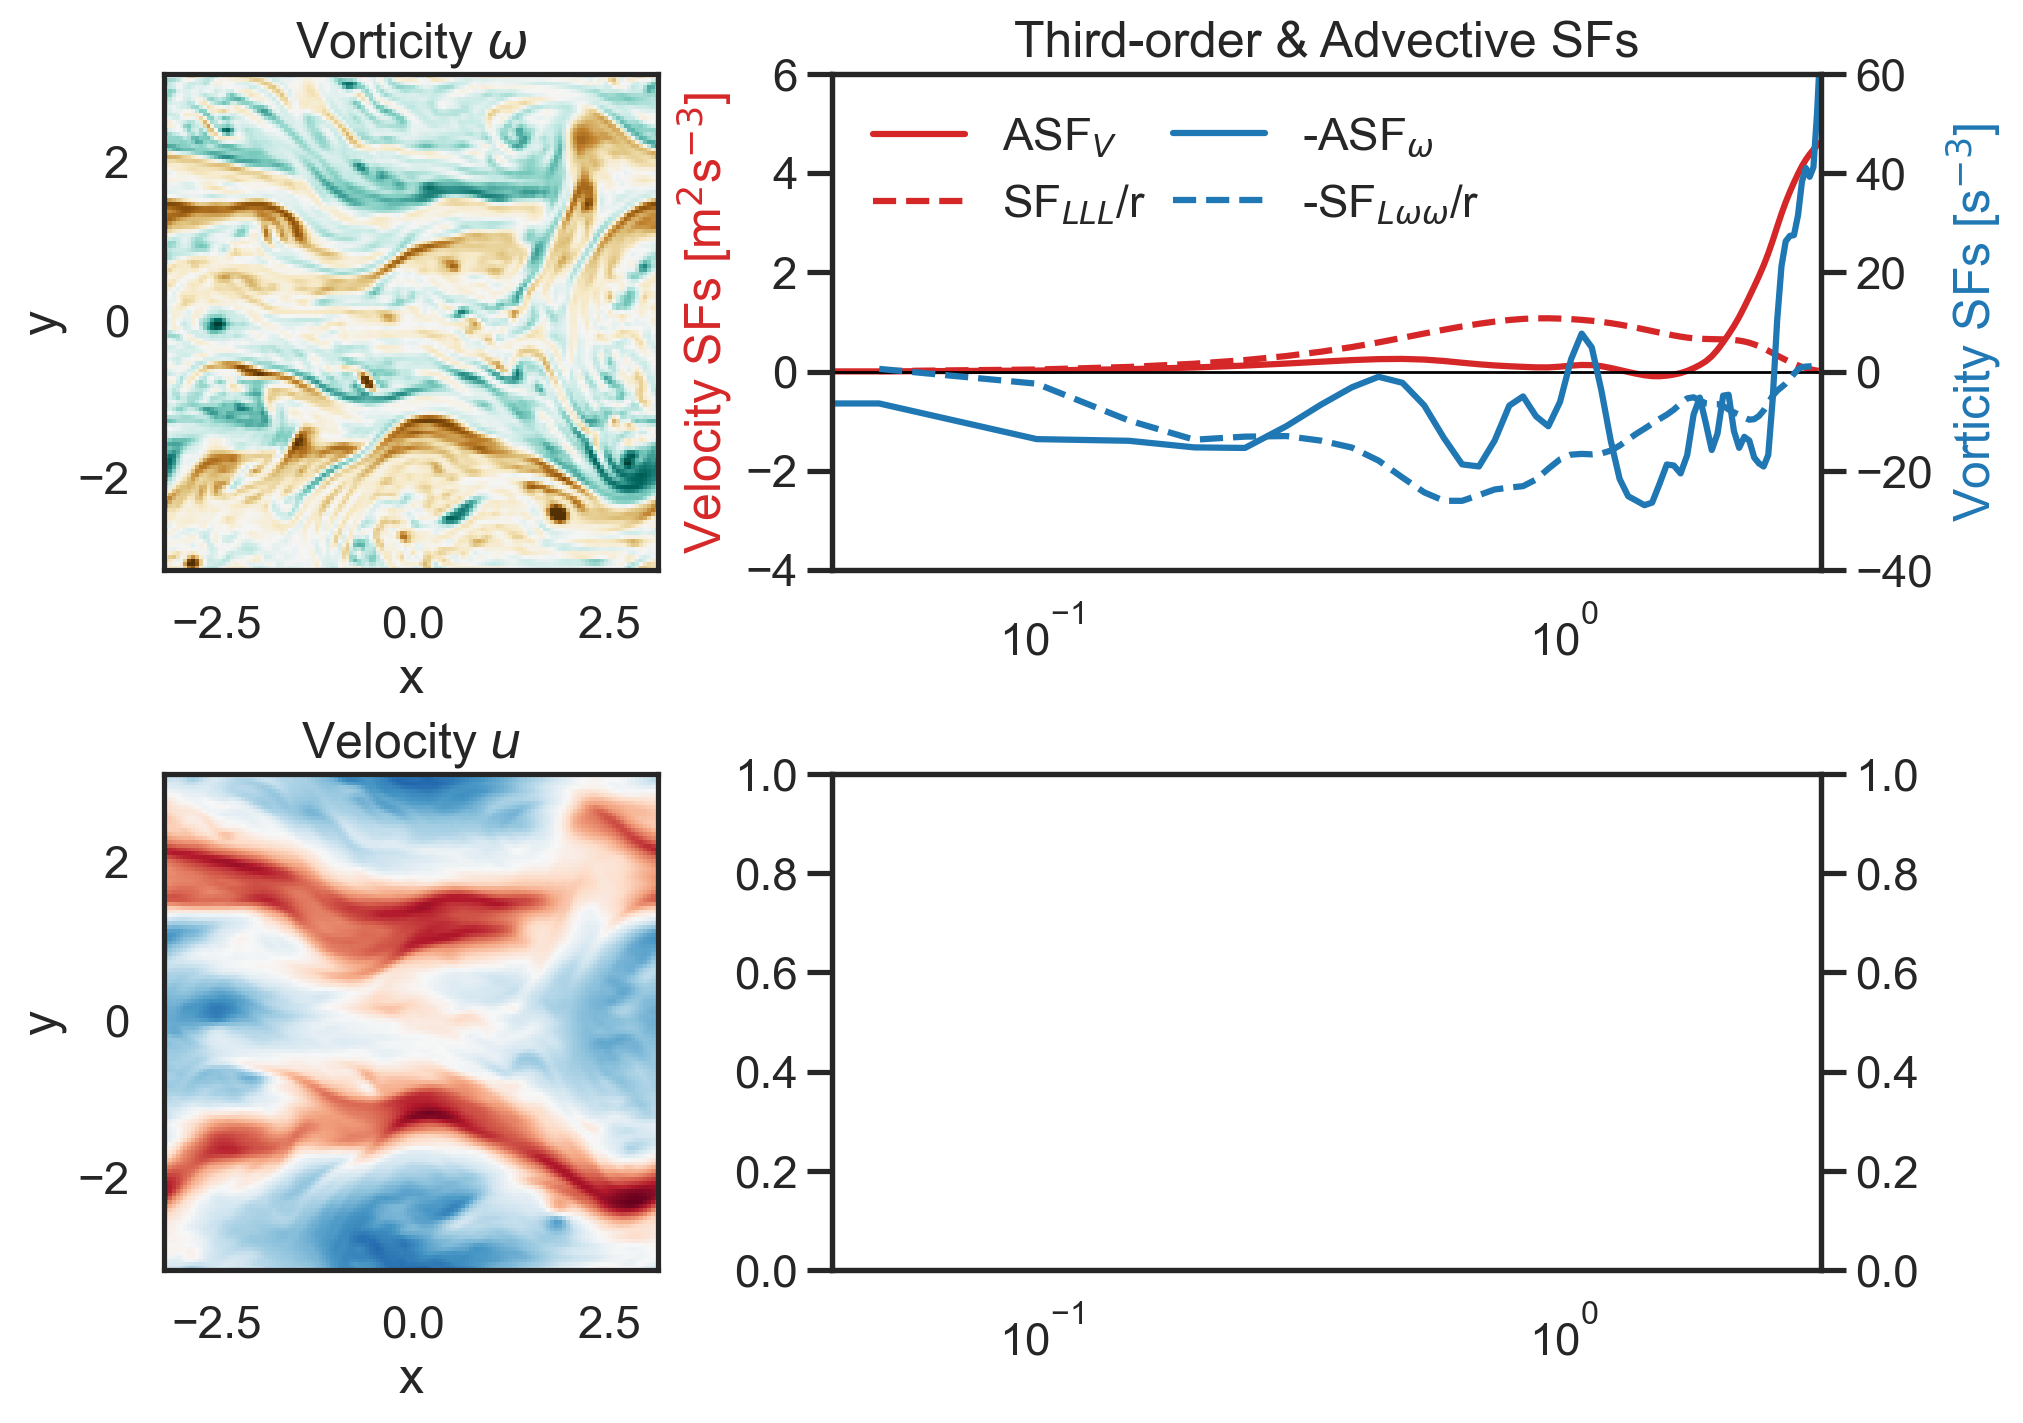

In [27]:
colors = plt.cm.Paired(np.linspace(0, 1, 12))

fig = plt.figure(layout="constrained", figsize=(10,7))

gs = GridSpec(2,3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1:])
ax3right = ax3.twinx()
ax4 = fig.add_subplot(gs[1, 1:], sharex=ax3)
ax4right = ax4.twinx()

q_map = ax1.pcolormesh(x, y, q, cmap="BrBG", vmin=-30, vmax=30)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Vorticity $\omega$")

u_map = ax2.pcolormesh(x, y, u, cmap="RdBu_r", vmin=-5, vmax=5)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Velocity $u$")

ax3.semilogx(
    sf["x-diffs"], sf["SF_advection_velocity_x"], label="ASF$_V$", color='tab:red',
)

ax3right.semilogx(
    sf["x-diffs"], sf["SF_advection_scalar_x"], label="-ASF$_{\omega}$", color='tab:blue',
)

ax3.semilogx(sf["x-diffs"], sf["SF_LLL_x"]/sf["x-diffs"], label="SF$_{LLL}$/r", color='tab:red', linestyle="dashed")


ax3right.semilogx(sf["x-diffs"], -sf["SF_LSS_x"]/sf["x-diffs"], label="-SF$_{L\omega\omega}$/r", color='tab:blue', linestyle="dashed")


ax3.set_ylabel("Velocity SFs [m$^2$s$^{-3}$]", color='tab:red')
ax3.legend(ncol=1, loc="upper left",frameon=False)
ax3.set_xlim(sf["x-diffs"].min(), sf["x-diffs"].max())
ax3.set_ylim(-4,6)
ax3.set_title('Third-order & Advective SFs')
ax3right.set_ylim(-4*10,6*10)
ax3right.set_ylabel("Vorticity SFs [s$^{-3}$]", color='tab:blue')
ax3right.legend(ncol=1, loc="upper center",frameon=False)


# ax3.semilogx(sf["x-diffs"], sf["SF_advection_velocity_x"]/2, color=colors[5], label="ASF$_V$(x)")
# ax3.semilogx(sf["y-diffs"], sf["SF_advection_velocity_y"]/2, color=colors[5], linestyle="dashed", label="ASF$_V$(y)")
# ax3.semilogx(sf["x-diffs"], 2 * sf["SF_LLL_x"] / (3*sf["x-diffs"]), color=colors[1], label="SF$_{LLL}$(x)")
# ax3.semilogx(sf["y-diffs"], 2 * sf["SF_LLL_y"] / (3*sf["y-diffs"]), color=colors[1], linestyle="dashed", label="SF$_{LLL}$(y)")
ax3.hlines(0, sf["x-diffs"].min(), sf["x-diffs"].max(), lw=1, color="black")
# ax3.set_xlabel("Separation Distance")
# ax3.set_ylabel("Inverse energy cascade rate")
# ax3.set_ylim(-1,1)
# ax3.set_xlim(sf["x-diffs"].min(), sf["x-diffs"].max())
# ax3.legend();

## Figure 3: 2D map of SFs from a 2D simulation

In [232]:
sf_maps = fluidsf.generate_sf_maps_2d(
    u=u, v=v, x=x, y=y, sf_type=["ASF_V", "LLL", "LL"]
)

In [233]:
TwoD_map_x_separations = np.append(
    -np.flip(sf_maps["x_separations"]), sf_maps["x_separations"], axis=0
)
TwoD_map_y_separations = np.append(
    -np.flip(sf_maps["y_separations"]), sf_maps["y_separations"], axis=0
)
TwoD_map_advective_SF = np.append(
    np.flip(sf_maps["SF_advection_velocity_xy"]),
    sf_maps["SF_advection_velocity_xy"],
    axis=0,
)
TwoD_map_LL_SF = np.append(np.flip(sf_maps["SF_LL_xy"]), sf_maps["SF_LL_xy"], axis=0)
TwoD_map_LLL_SF = np.append(np.flip(sf_maps["SF_LLL_xy"]), sf_maps["SF_LLL_xy"], axis=0)

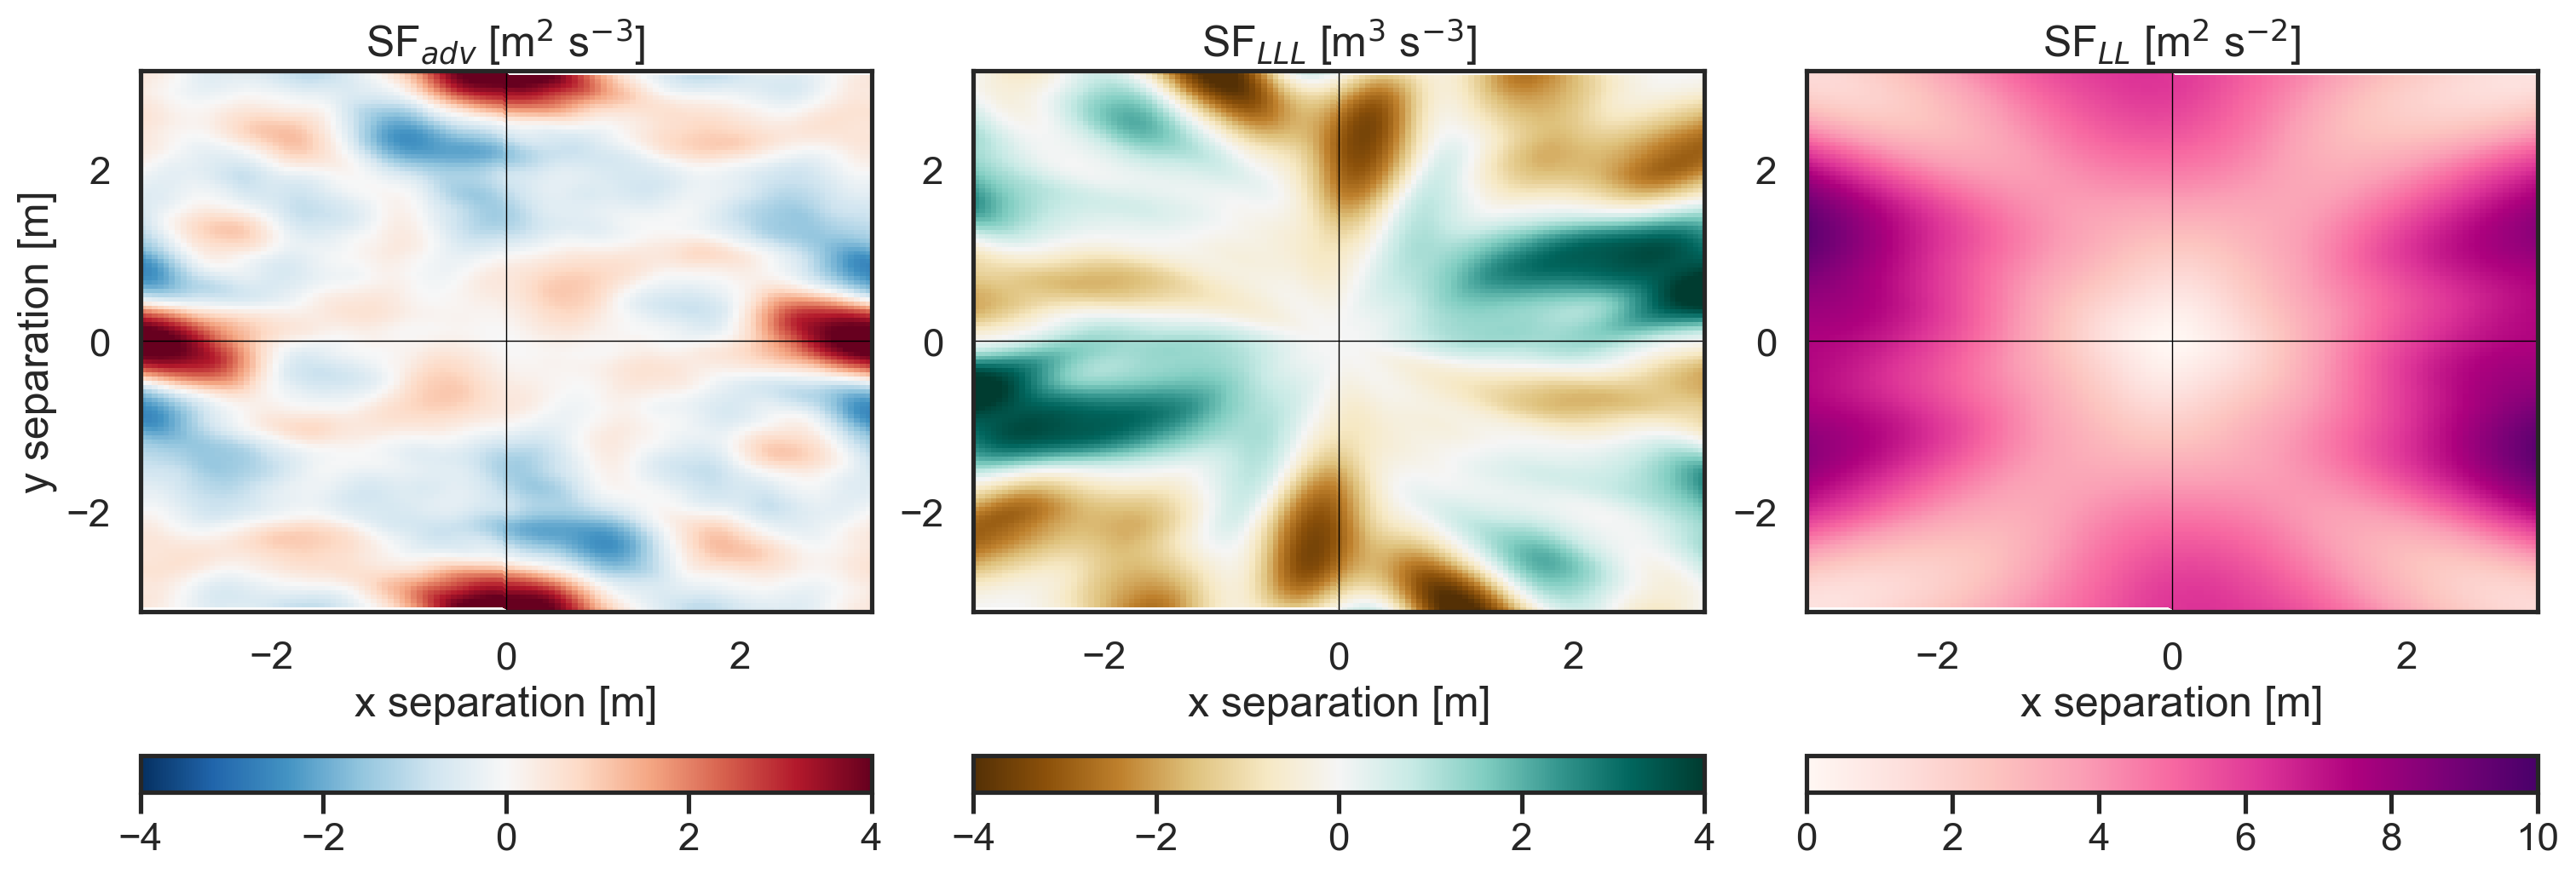

In [407]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="constrained")

Advective = axs[0].pcolormesh(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_advective_SF,
    vmin=-4,
    vmax=4,
    cmap=plt.cm.RdBu_r,
)
axs[0].set_xlabel("x separation [m]")
axs[0].set_ylabel("y separation [m]")
axs[0].set_title("SF$_{adv}$ [m$^2$ s$^{-3}$]")

cbar = fig.colorbar(Advective, ax=axs[0], location="bottom")
# ticks = cbar.get_ticks()

# # Remove -10e-5 and 10e-5 from the ticks
# ticks = [tick for tick in ticks if tick not in [-10e-4, 10e-4]]
# cbar.set_ticks(ticks)

axs[0].axhline(0, color="black",lw=0.5)
axs[0].axvline(0, color="black", lw=0.5)

LLL = axs[1].pcolormesh(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_LLL_SF,
    vmin=-4,
    vmax=4,
    cmap=plt.cm.BrBG,
)
axs[1].set_xlabel("x separation [m]")
axs[1].set_title("SF$_{LLL}$ [m$^3$ s$^{-3}$]")

cbar = fig.colorbar(LLL, ax=axs[1], location="bottom")
# cbar.set_ticks([-0.05, 0, 0.05])
axs[1].axhline(0, color="black", lw=0.5)
axs[1].axvline(0, color="black", lw=0.5)

LL = axs[2].pcolormesh(
    TwoD_map_x_separations,
    TwoD_map_y_separations,
    TwoD_map_LL_SF,
    # norm=LogNorm(vmin=1e0, vmax=1e1),
    cmap=plt.cm.RdPu,
    vmin=0,
    vmax=10,
)
axs[2].set_xlabel("x separation [m]")
axs[2].set_title("SF$_{LL}$ [m$^2$ s$^{-2}$]")

cbar = fig.colorbar(LL, ax=axs[2], location="bottom")
# cbar.set_ticks([0, 1, 2])
axs[2].axhline(0, color="black", lw=0.5)
axs[2].axvline(0, color="black", lw=0.5);

## Figure 2: Structure functions from SWOT altimetry

In [244]:
import xarray as xr

# Provide the path to the SWOT data you have downloaded
ds = xr.open_dataset(
    "/Users/cassswagner/software_development/FluidSF_dev_space/fluidsf/docs/source/example_data/SWOT_L3_LR_SSH_Expert_SAMPLE.nc"
)

In [ ]:
localbox = [-90, -30, 20, 60]
localbox_subset = [-49, -41, 44, 50]

In [268]:
ds_cut = ds.where(
    (ds.latitude > localbox_subset[2])
    & (ds.latitude < localbox_subset[3])
    & (ds.longitude < 360 + localbox_subset[1])
    & (ds.longitude > 360 + localbox_subset[0]),
    drop=True,
)

# Define the grid spacing in meters
dx = 2000
dy = 2000

# Define x and y positions based on number of pixels and lines and dx/dy
x_swot = dx * ds_cut.num_pixels.values
y_swot = dy * ds_cut.num_lines.values

# Compute the structure functions
sf_swot = fluidsf.generate_structure_functions(
    u=ds_cut.ugos.data,
    v=ds_cut.vgos.data,
    x=x_swot,
    y=y_swot,
    sf_type=["ASF_V", "LLL", "LL"],
    boundary=None,
    grid_type="uniform",
)

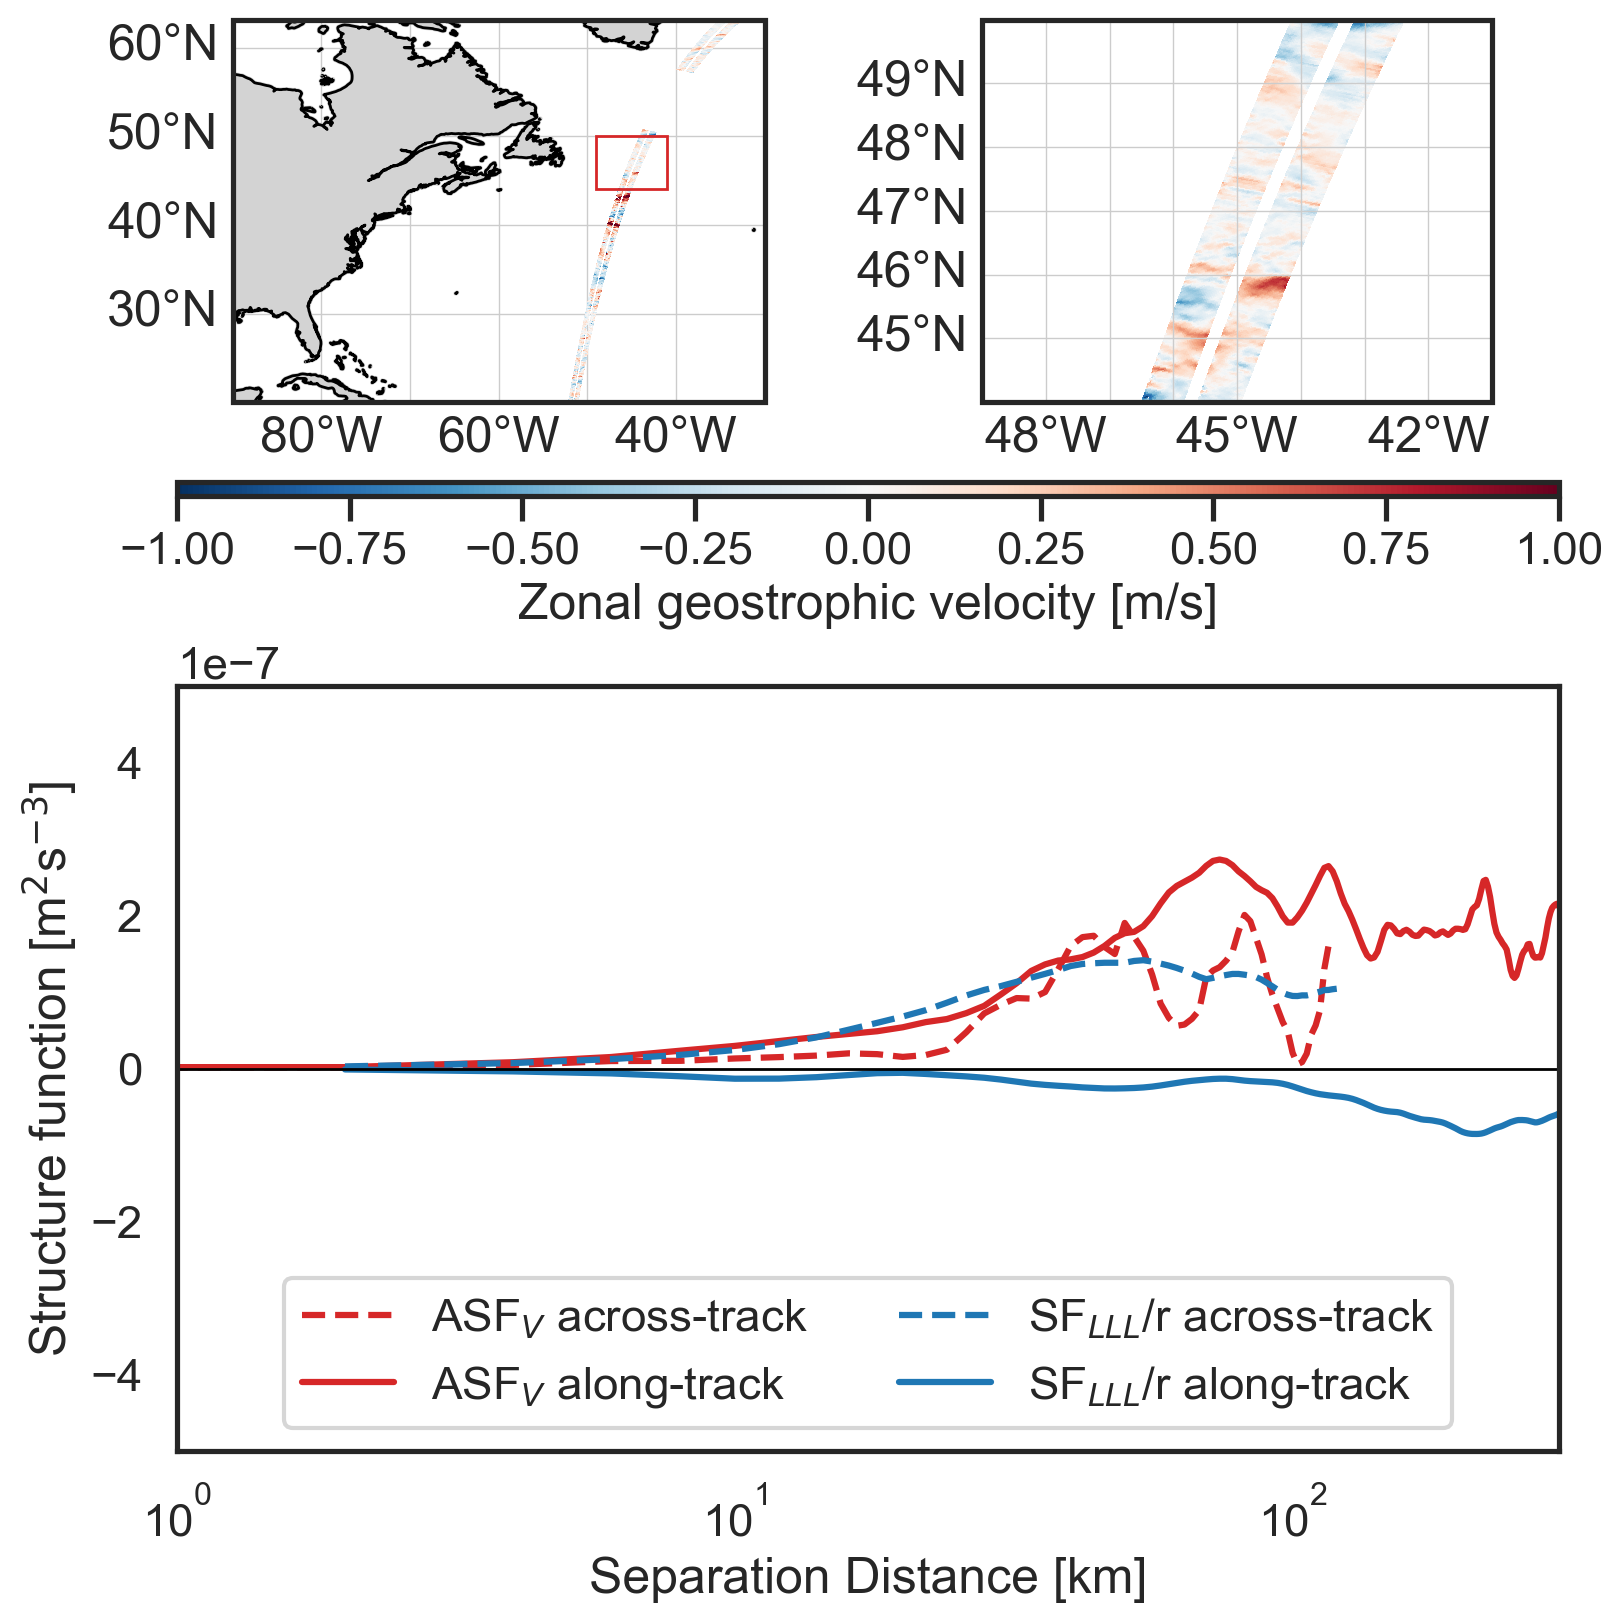

In [494]:
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib.patches as mpatches

fig = plt.figure(layout="constrained", figsize=(8, 8))

gs = GridSpec(3, 2, figure=fig)
# gs.update(hspace=0.1)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1:, :])

ax1.set_extent(localbox)
ax2.set_extent(localbox_subset)
plot_kwargs = {
    "x": "longitude",
    "y": "latitude",
    "cmap": "RdBu_r",
    "vmin": -1,
    "vmax": 1,
    # "cbar_kwargs": {"shrink": 0.9},
}

ugos_total = ds.ugos.plot.pcolormesh(ax=ax1, **plot_kwargs, add_colorbar=False)
ugos_zoom = ds.ugos.plot.pcolormesh(ax=ax2, **plot_kwargs, add_colorbar=False)
ax1.coastlines(lw=1)
ax1.add_feature(cartopy.feature.LAND, zorder=1, color="lightgray")
gl1 = ax1.gridlines(draw_labels=True, lw=0.5,zorder=0)
gl1.top_labels = False
gl1.right_labels = False

ax1.add_patch(
    mpatches.Rectangle(
        xy=[localbox_subset[0], localbox_subset[2]],
        width=localbox_subset[1] - localbox_subset[0],
        height=localbox_subset[3] - localbox_subset[2],
        edgecolor="tab:red",
        fill=None,
        lw=1,
        transform=ccrs.PlateCarree(),
        zorder=1,
    )
)

ax2.coastlines()
gl2 = ax2.gridlines(draw_labels=True, lw=0.5)
gl2.top_labels = False
gl2.right_labels = False

fig.colorbar(
    ugos_zoom,
    ax=np.asarray([ax1, ax2]),
    location="bottom",
    aspect=100,
    label="Zonal geostrophic velocity [m/s]",
)


ax3.semilogx(
    sf_swot["x-diffs"] / 1e3,
    sf_swot["SF_advection_velocity_x"],
    label="ASF$_V$ across-track",
    color="tab:red",
    linestyle="dashed",
)
ax3.semilogx(
    sf_swot["y-diffs"] / 1e3,
    sf_swot["SF_advection_velocity_y"],
    label="ASF$_V$ along-track",
    color="tab:red",
)
ax3.semilogx(
    sf_swot["x-diffs"] / 1e3,
    sf_swot["SF_LLL_x"] / sf_swot["x-diffs"],
    label="SF$_{LLL}$/r across-track",
    color="tab:blue",
    linestyle="dashed",
)
ax3.semilogx(
    sf_swot["y-diffs"] / 1e3,
    sf_swot["SF_LLL_y"] / sf_swot["y-diffs"],
    label="SF$_{LLL}$/r along-track",
    color="tab:blue",
)
ax3.hlines(0, 1e0, 1e3, lw=1, color="black")
ax3.set_xlabel("Separation Distance [km]")
ax3.set_ylabel("Structure function [m$^2$s$^{-3}$]")
ax3.set_xlim(1e0, 3e2)
ax3.set_ylim(-5e-7, 5e-7)
ax3.legend(loc="lower center", ncol=2);

In [4]:
50/5e-4

100000.0